In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Ignoring Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./dataset.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# EDA

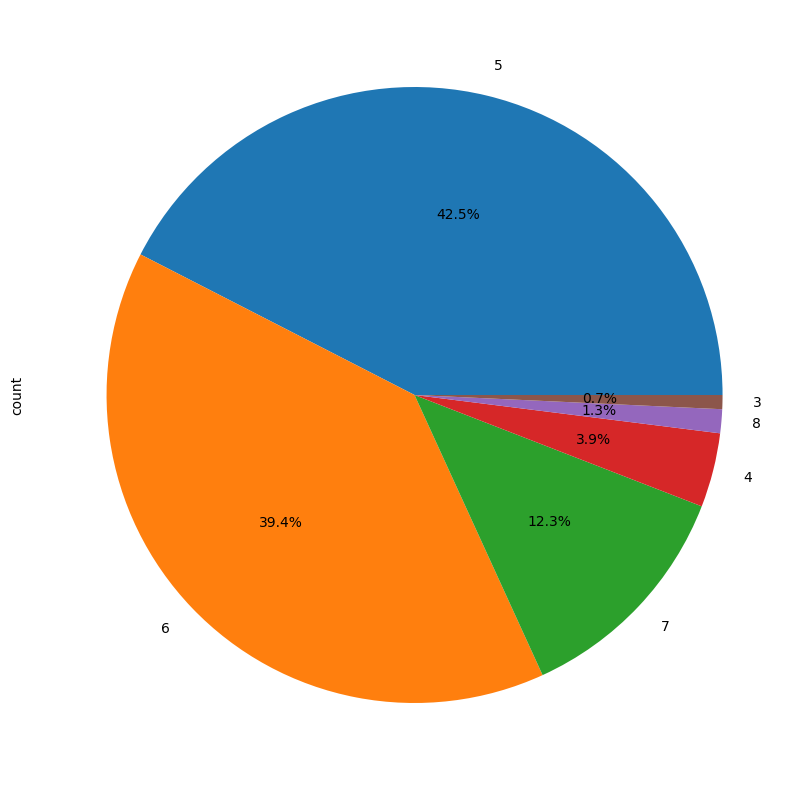

In [6]:
plt.figure(1, figsize=(10, 10))
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

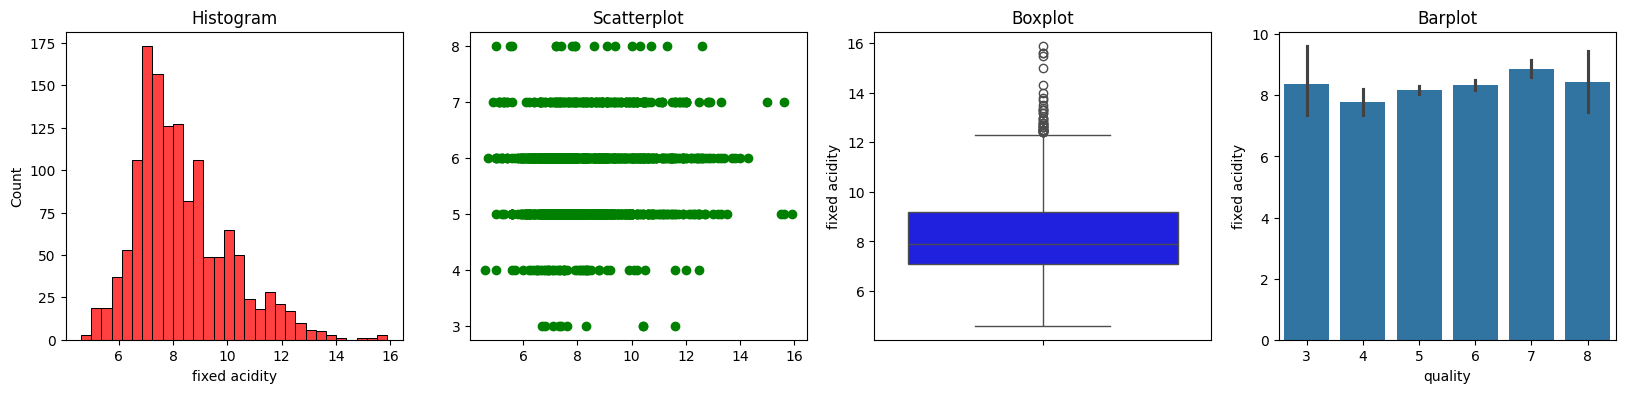

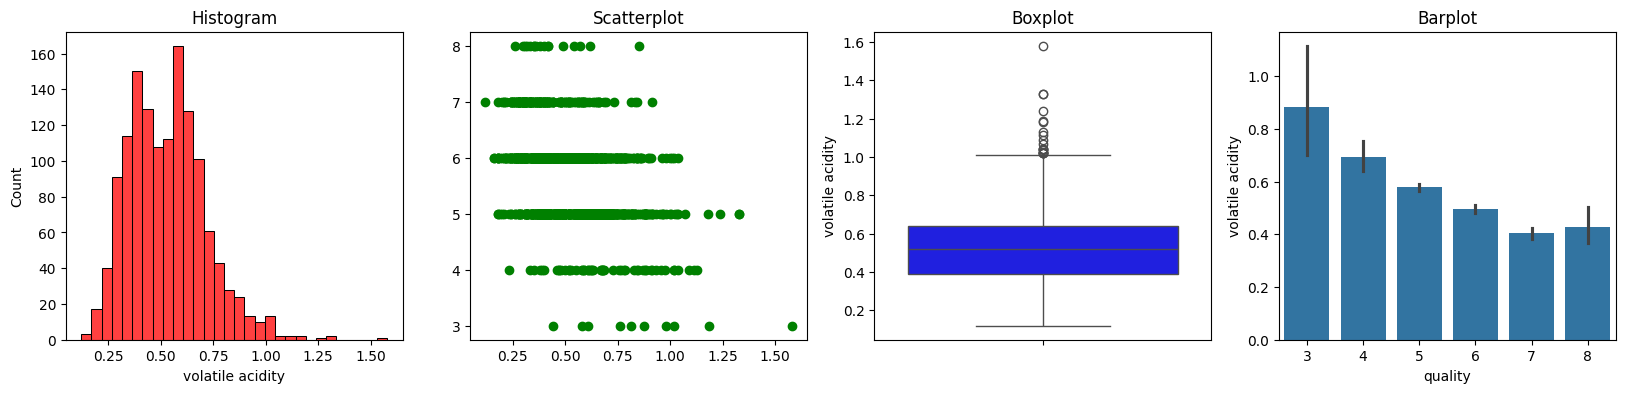

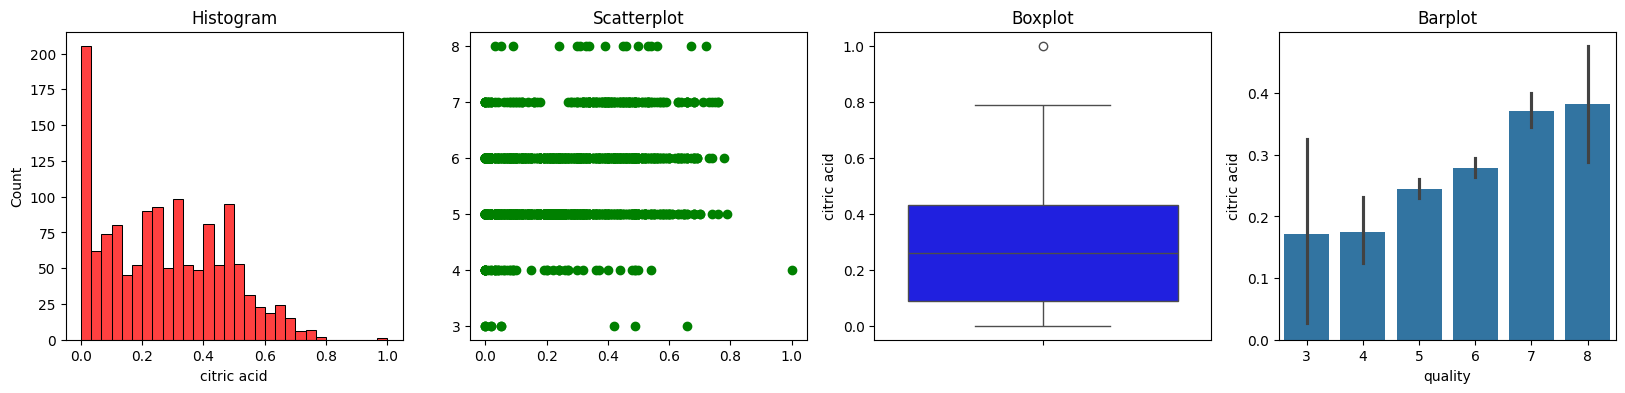

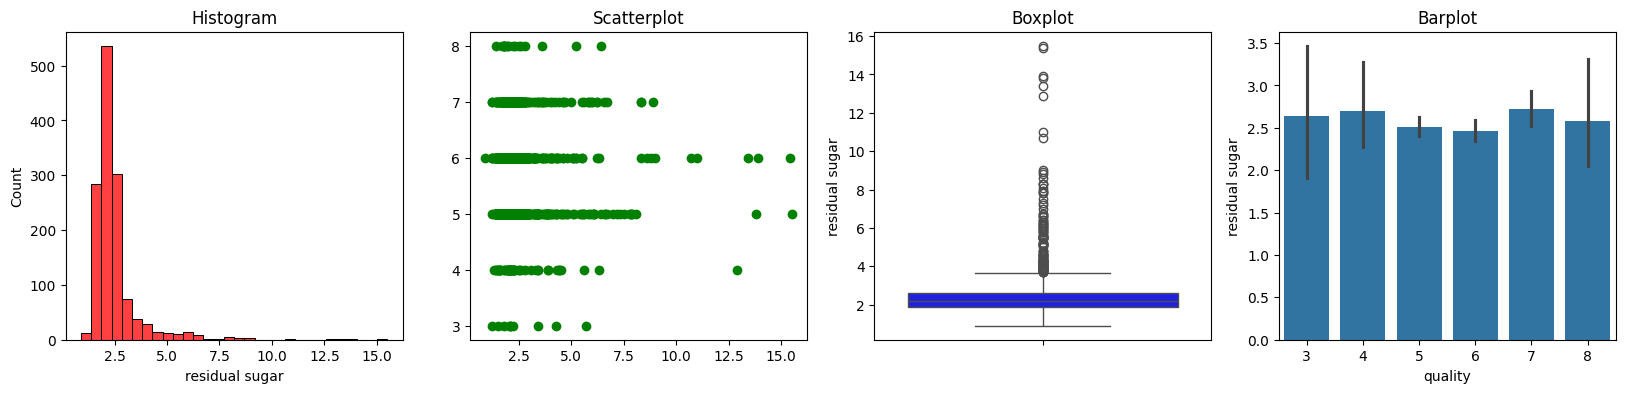

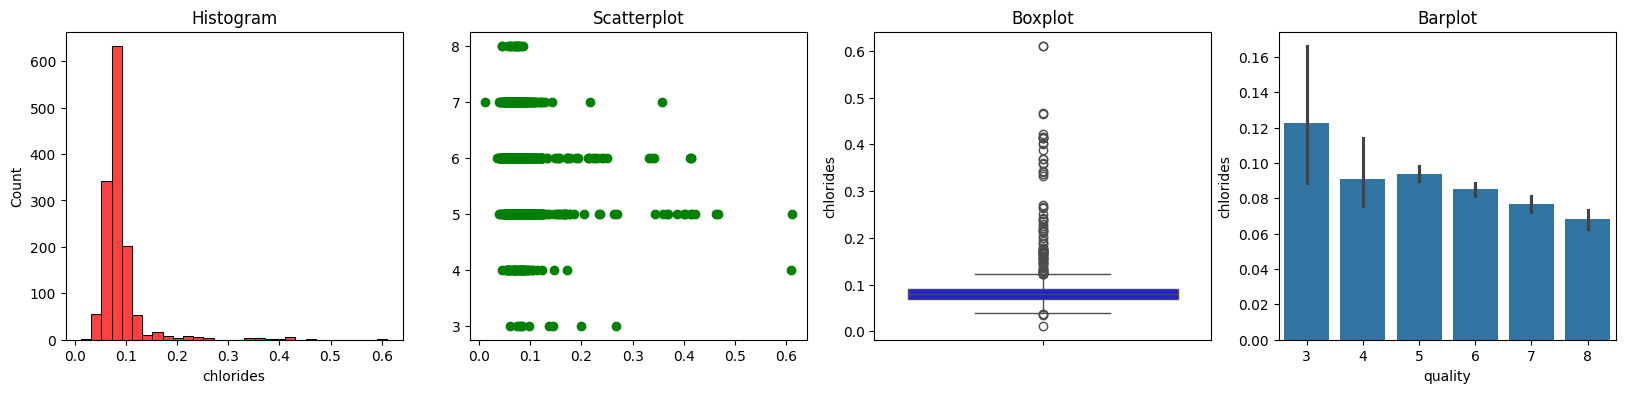

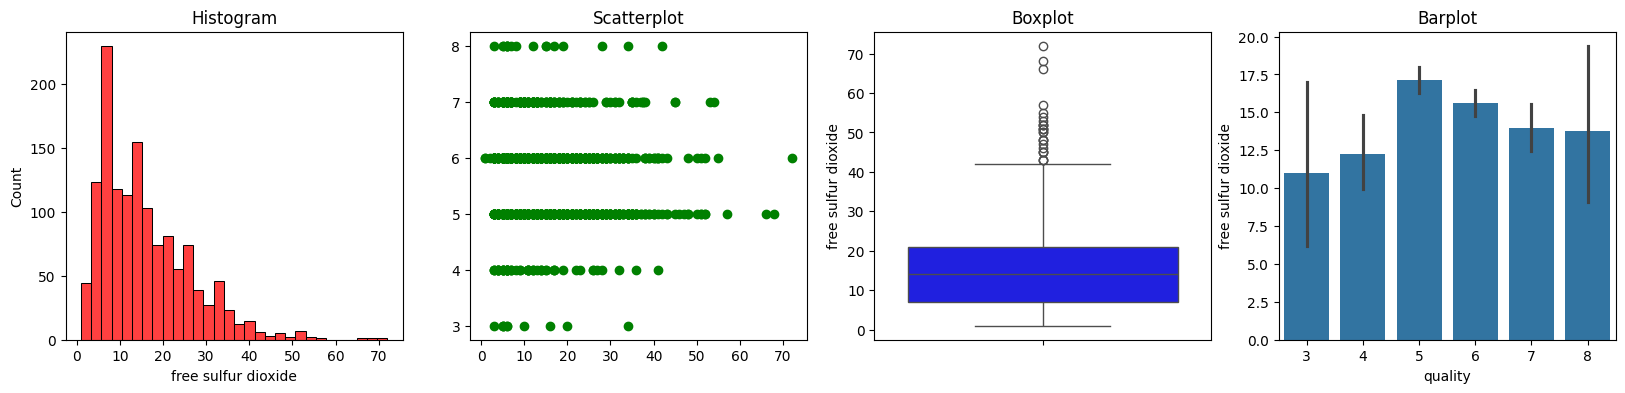

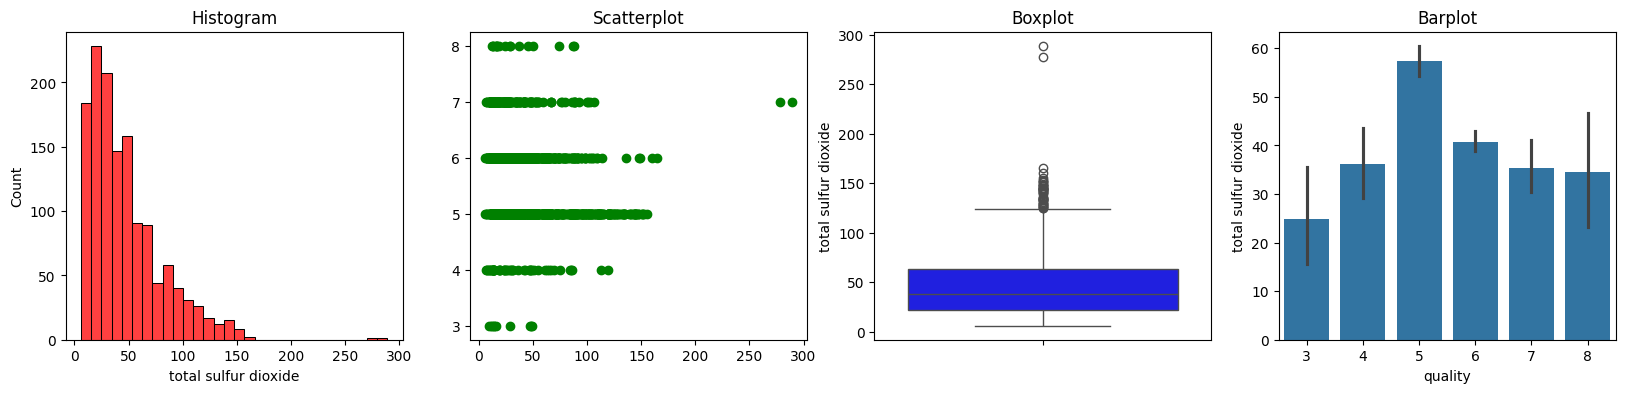

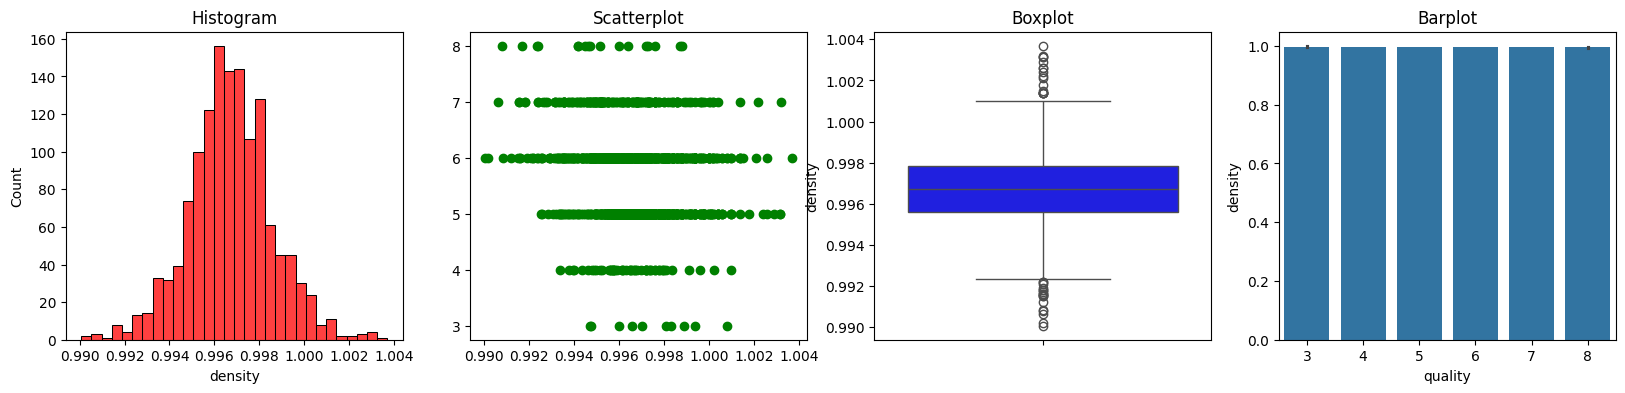

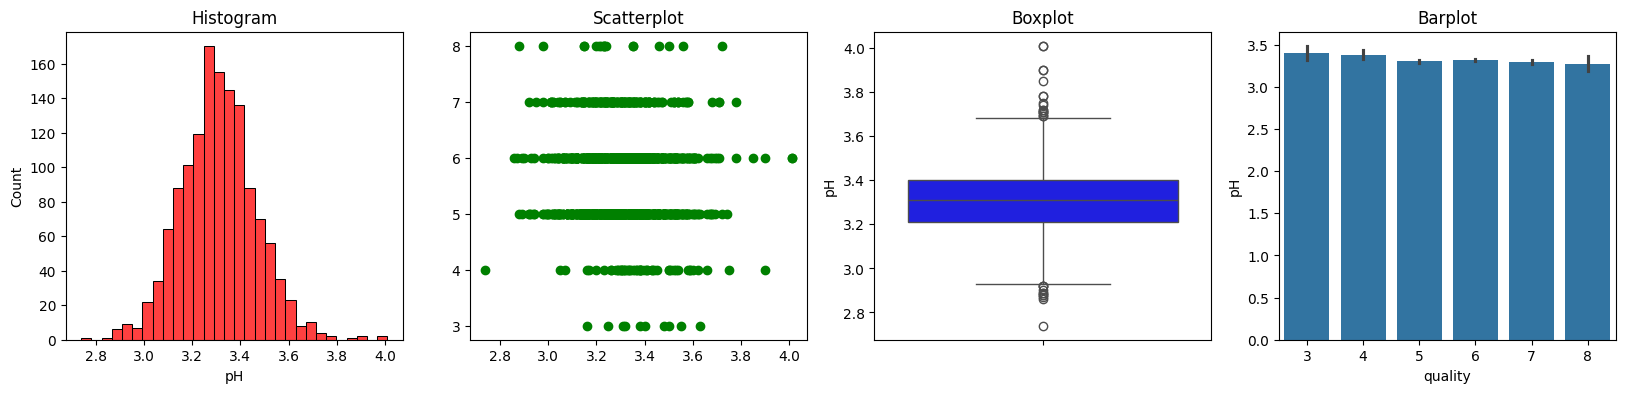

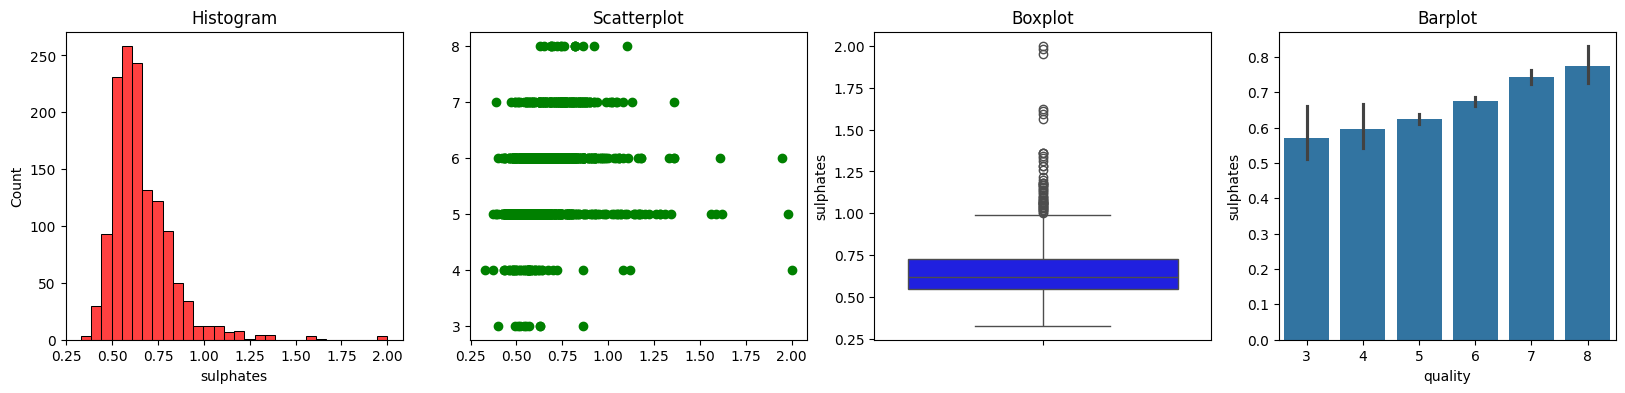

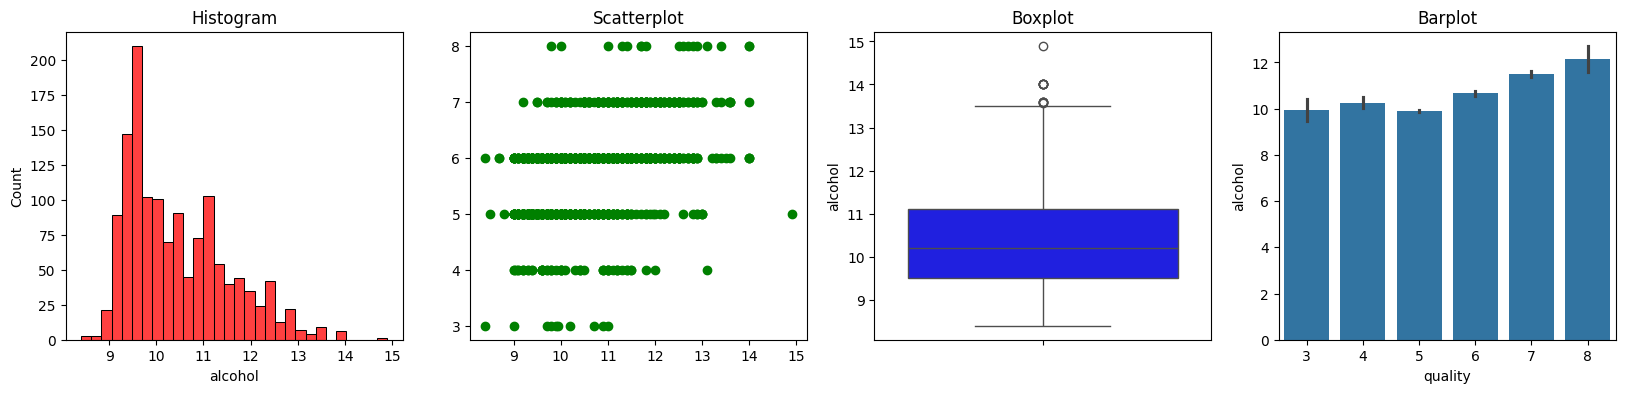

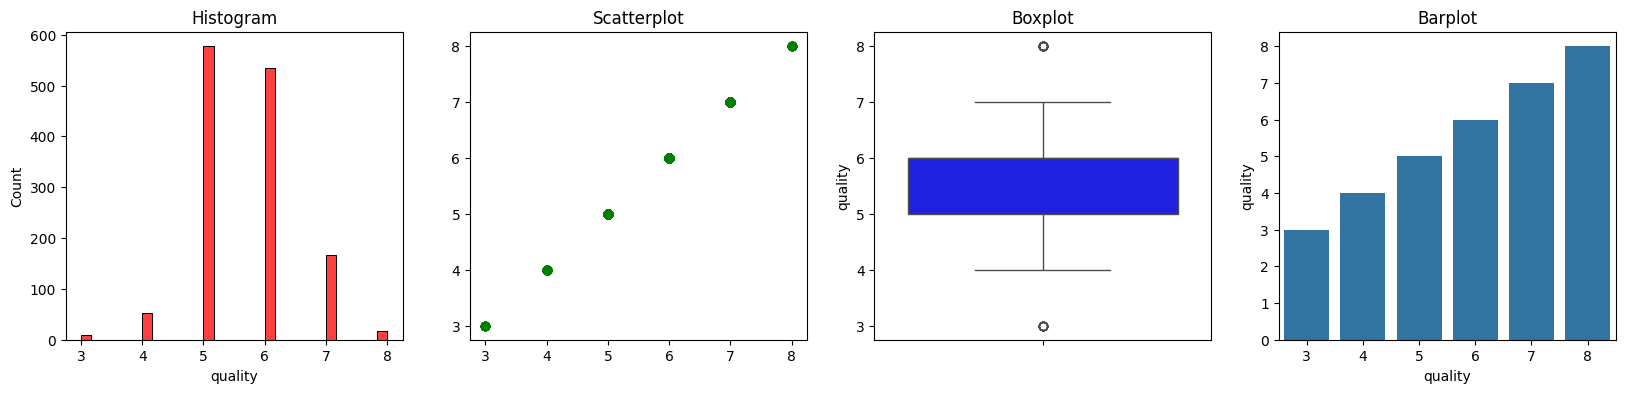

In [7]:
# Function to create a histogram, and a boxplot and scatter plot.
def diagnostic_plots(df, variable,target):
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')

    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    plt.show()

for variable in df:
    diagnostic_plots(df,variable,'quality')

1. pH appears to be normally distributed but other independent variables are skewed.
2. Outliers present in variables other than alcohol. 

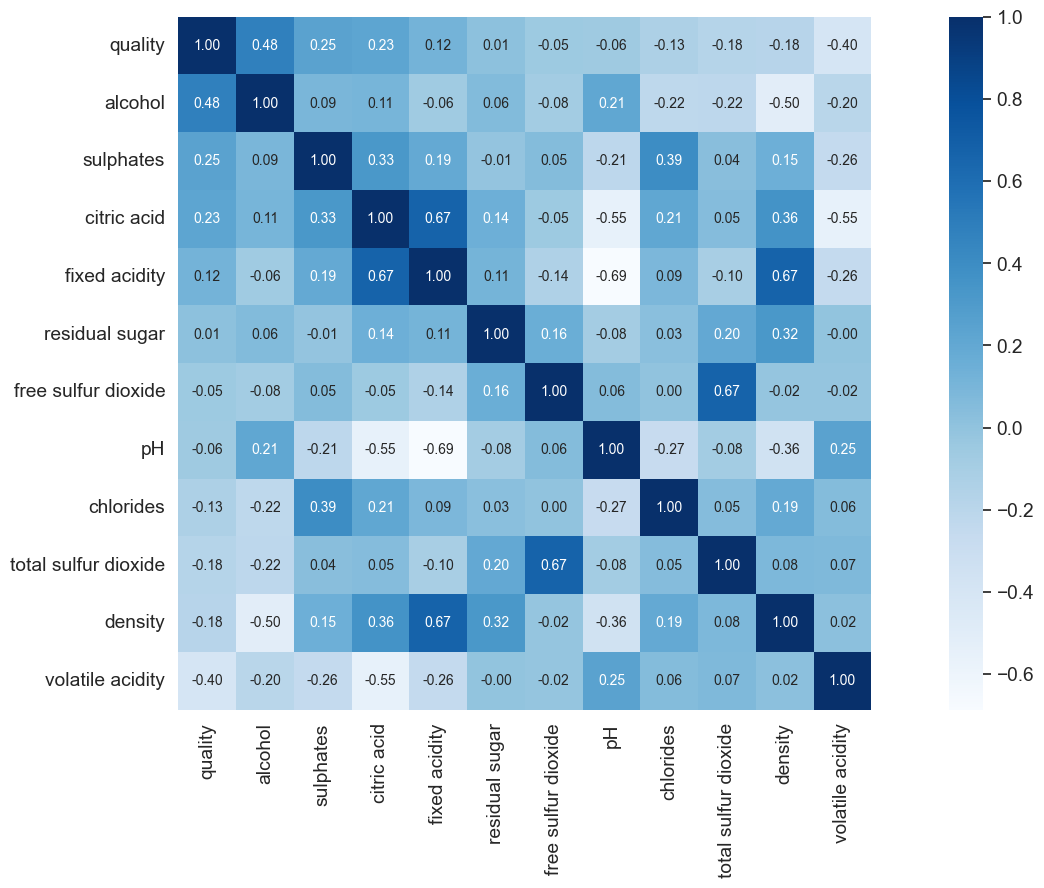

In [8]:
corr = df.corr()
plt.figure(figsize=(20, 9))
cols = corr.nlargest(12, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

1. Alcohol has strongest positive correlation with quality, followed by suplhates, citric acid and fixed acidity.
2. Volatile acidity has strongest negative correlation with quality, followed by total SO2, density and chlorides.

# Outlier Reduction

In [9]:
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

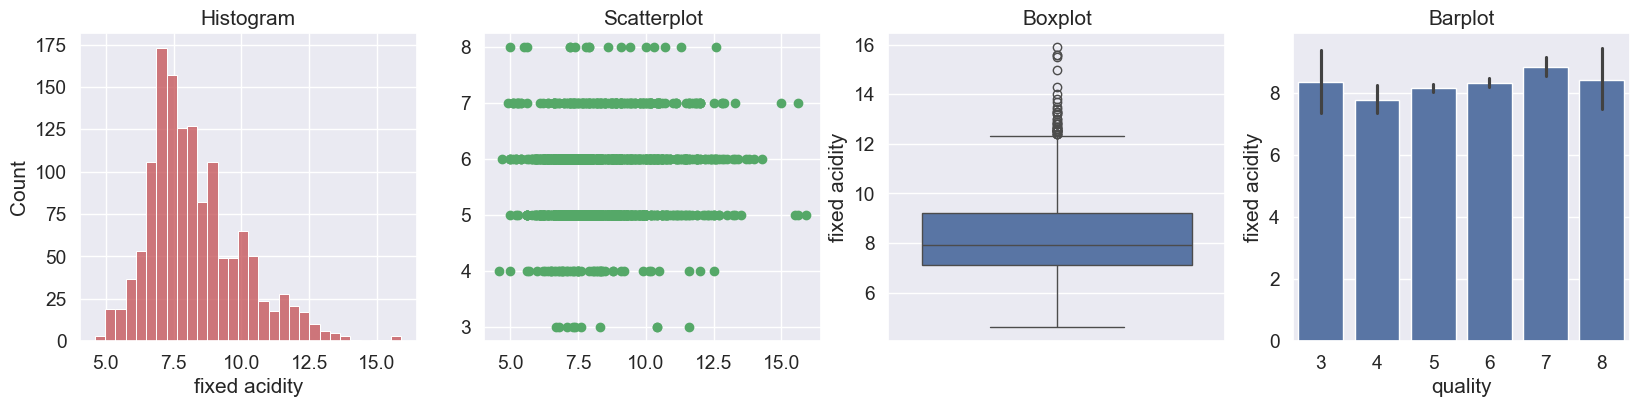

In [10]:
diagnostic_plots(df,'fixed acidity','quality')

In [11]:
df.loc[detect_outliers(df, df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4


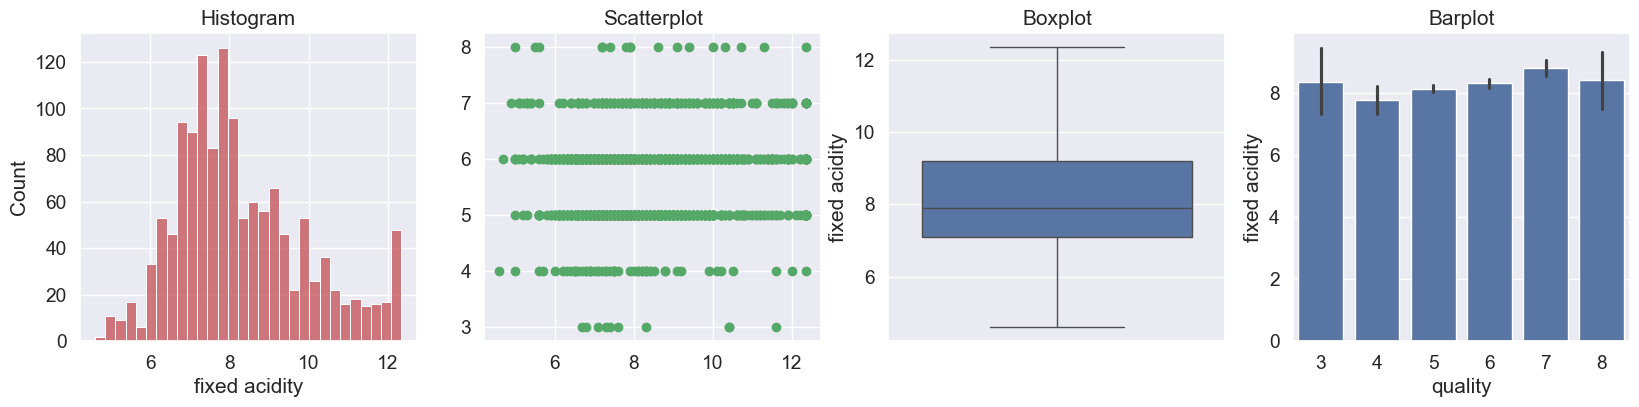

In [12]:
from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(
  capping_method="iqr", # IQR rule boundaries or Gaussian mean & std
  tail="both",
  fold=1.5,
  variables=list(df.columns[:-2]) # Removing Alcohol and quality
)

winsorizer.fit(df)
df = winsorizer.transform(df)
diagnostic_plots(df,'fixed acidity','quality')

# Normal Distribution

In [13]:
import feature_engine.transformation as vt

# Taking all skewed variables
cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

lt = vt.LogTransformer(variables=cols)
lt.fit(df)
df = lt.transform(df)

In [14]:
# Turn it into binary classification
bins = (2, 6.5, 8)
group_names = [0, 1] # Bad, Good
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

# Scaling

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  df.iloc[:,:-1],
  df["quality"],
  test_size=0.3,
  random_state=42,
  stratify=df["quality"]
)

X_train.shape, X_test.shape

((951, 11), (408, 11))

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

dct = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
sgd = SGDClassifier()

# Define the list classifiers
classifiers = [
    ("knn", knn),
    ("rf", rf),
    ("logreg", logreg),
    ("svc", svc),
    ("sgd", sgd),
    ("dct", dct)
]

In [18]:
from sklearn.metrics import accuracy_score

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} score : {:.3f}'.format(clf_name, acc))

knn score : 0.868
rf score : 0.885
logreg score : 0.875
svc score : 0.880
sgd score : 0.855
dct score : 0.816


# Hyperparameter Tuning on Random Forest

In [19]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth': (1, 5, 10),
    'min_samples_leaf': (1, 5, 10)
#  "n_estimators": np.arange(10, 1000, 500),
#  "max_depth": [None, 3, 5, 10],
#  "min_samples_split": np.arange(2, 20, 2),
#  "min_samples_leaf": np.arange(1, 20, 2)
}

In [20]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(
  rf, 
  param_grid=param_grid, 
  scoring='accuracy', 
  cv=5,
  n_jobs=6
)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=6,
             param_grid={'max_depth': (1, 5, 10),
                         'min_samples_leaf': (1, 5, 10),
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [21]:
gridsearch.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}

In [22]:
tuned_rf = RandomForestClassifier(max_depth= 10, min_samples_leaf = 1, n_estimators = 100)
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

# Evaluation

In [23]:
from sklearn.metrics import classification_report

pred = tuned_rf.predict(X_test)
print("Accuracy Score: ", accuracy_score(pred, y_test))
print("classification Report:\n",classification_report(pred, y_test))

Accuracy Score:  0.8725490196078431
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       375
           1       0.33      0.55      0.41        33

    accuracy                           0.87       408
   macro avg       0.64      0.72      0.67       408
weighted avg       0.91      0.87      0.89       408



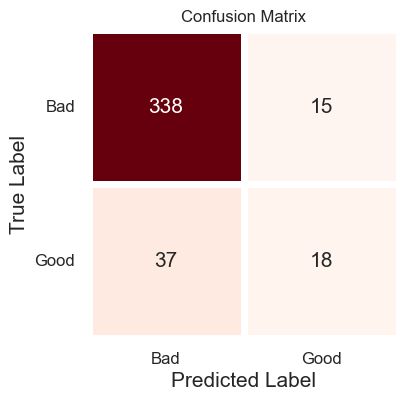

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# Save the model file

In [32]:
import joblib

joblib.dump(rf, "model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [31]:
X_test[0]

array([ 0.08601924,  0.5364754 , -0.75574107,  0.58992473,  0.30392481,
       -1.13471019, -0.62902677,  0.91561273,  0.03124408, -0.34589691,
       -1.16626092])

In [40]:
loaded_model = joblib.load("model.joblib")
loaded_model.predict(scaler.transform(np.array(df.iloc[1, :-1].to_list()).reshape(1, -1)))

array([0], dtype=int64)